## Step 1: Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Project\First-Phase-Practice-Projects--1-\Red wine\Dataset.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Step 2 : Identification of variables and data types

### Project Description
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.
### Attribute Information
- Input variables (based on physicochemical tests):
1. fixed acidity (tartaric acid - g / dm^3)
2. volatile acidity (acetic acid - g / dm^3)
3. citric acid (g / dm^3)
4. residual sugar (g / dm^3)
5. chlorides (sodium chloride - g / dm^3
6. free sulfur dioxide (mg / dm^3)
7. total sulfur dioxide (mg / dm^3)
8. density (g / cm^3)
9. pH
10. sulphates (potassium sulphate - g / dm3)
11. alcohol (% by volume)
- Output variable (based on sensory data): 
12. quality (score between 0 and 10)



1 - fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2 - volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3 - citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4 - residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5 - chlorides: the amount of salt in the wine

6 - free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7 - total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8 - density: the density of water is close to that of water depending on the percent alcohol and sugar content

9 - pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10 - sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11 - alcohol: the percent alcohol content of the wine

Output variable (based on sensory data): 

12 - quality (score between 0 and 10)

### Ster 3: Analising basic metrics

In [3]:
data.shape

(1599, 12)

In [4]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### we can observe that there are no null values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


##### since every data is either int 64 or float64  there are no namespaces(' ') 

In [6]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

 from above data it is evident that the All Lables(input variables) are continous and target (output variable ) is categorical

In [7]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- we can observe that mean is grater than median(Right skewed) in case of fixed acidity,citric acid, residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol
- we can observe that mean isalmost equal to median(normally distributed) in case of volatile acidity,density and pH
- in few cases like residual suger and chlorides there is huge difference between max and 3rd quartile  indicating presence of outliers

#### Step 4: graphical univariate analysis

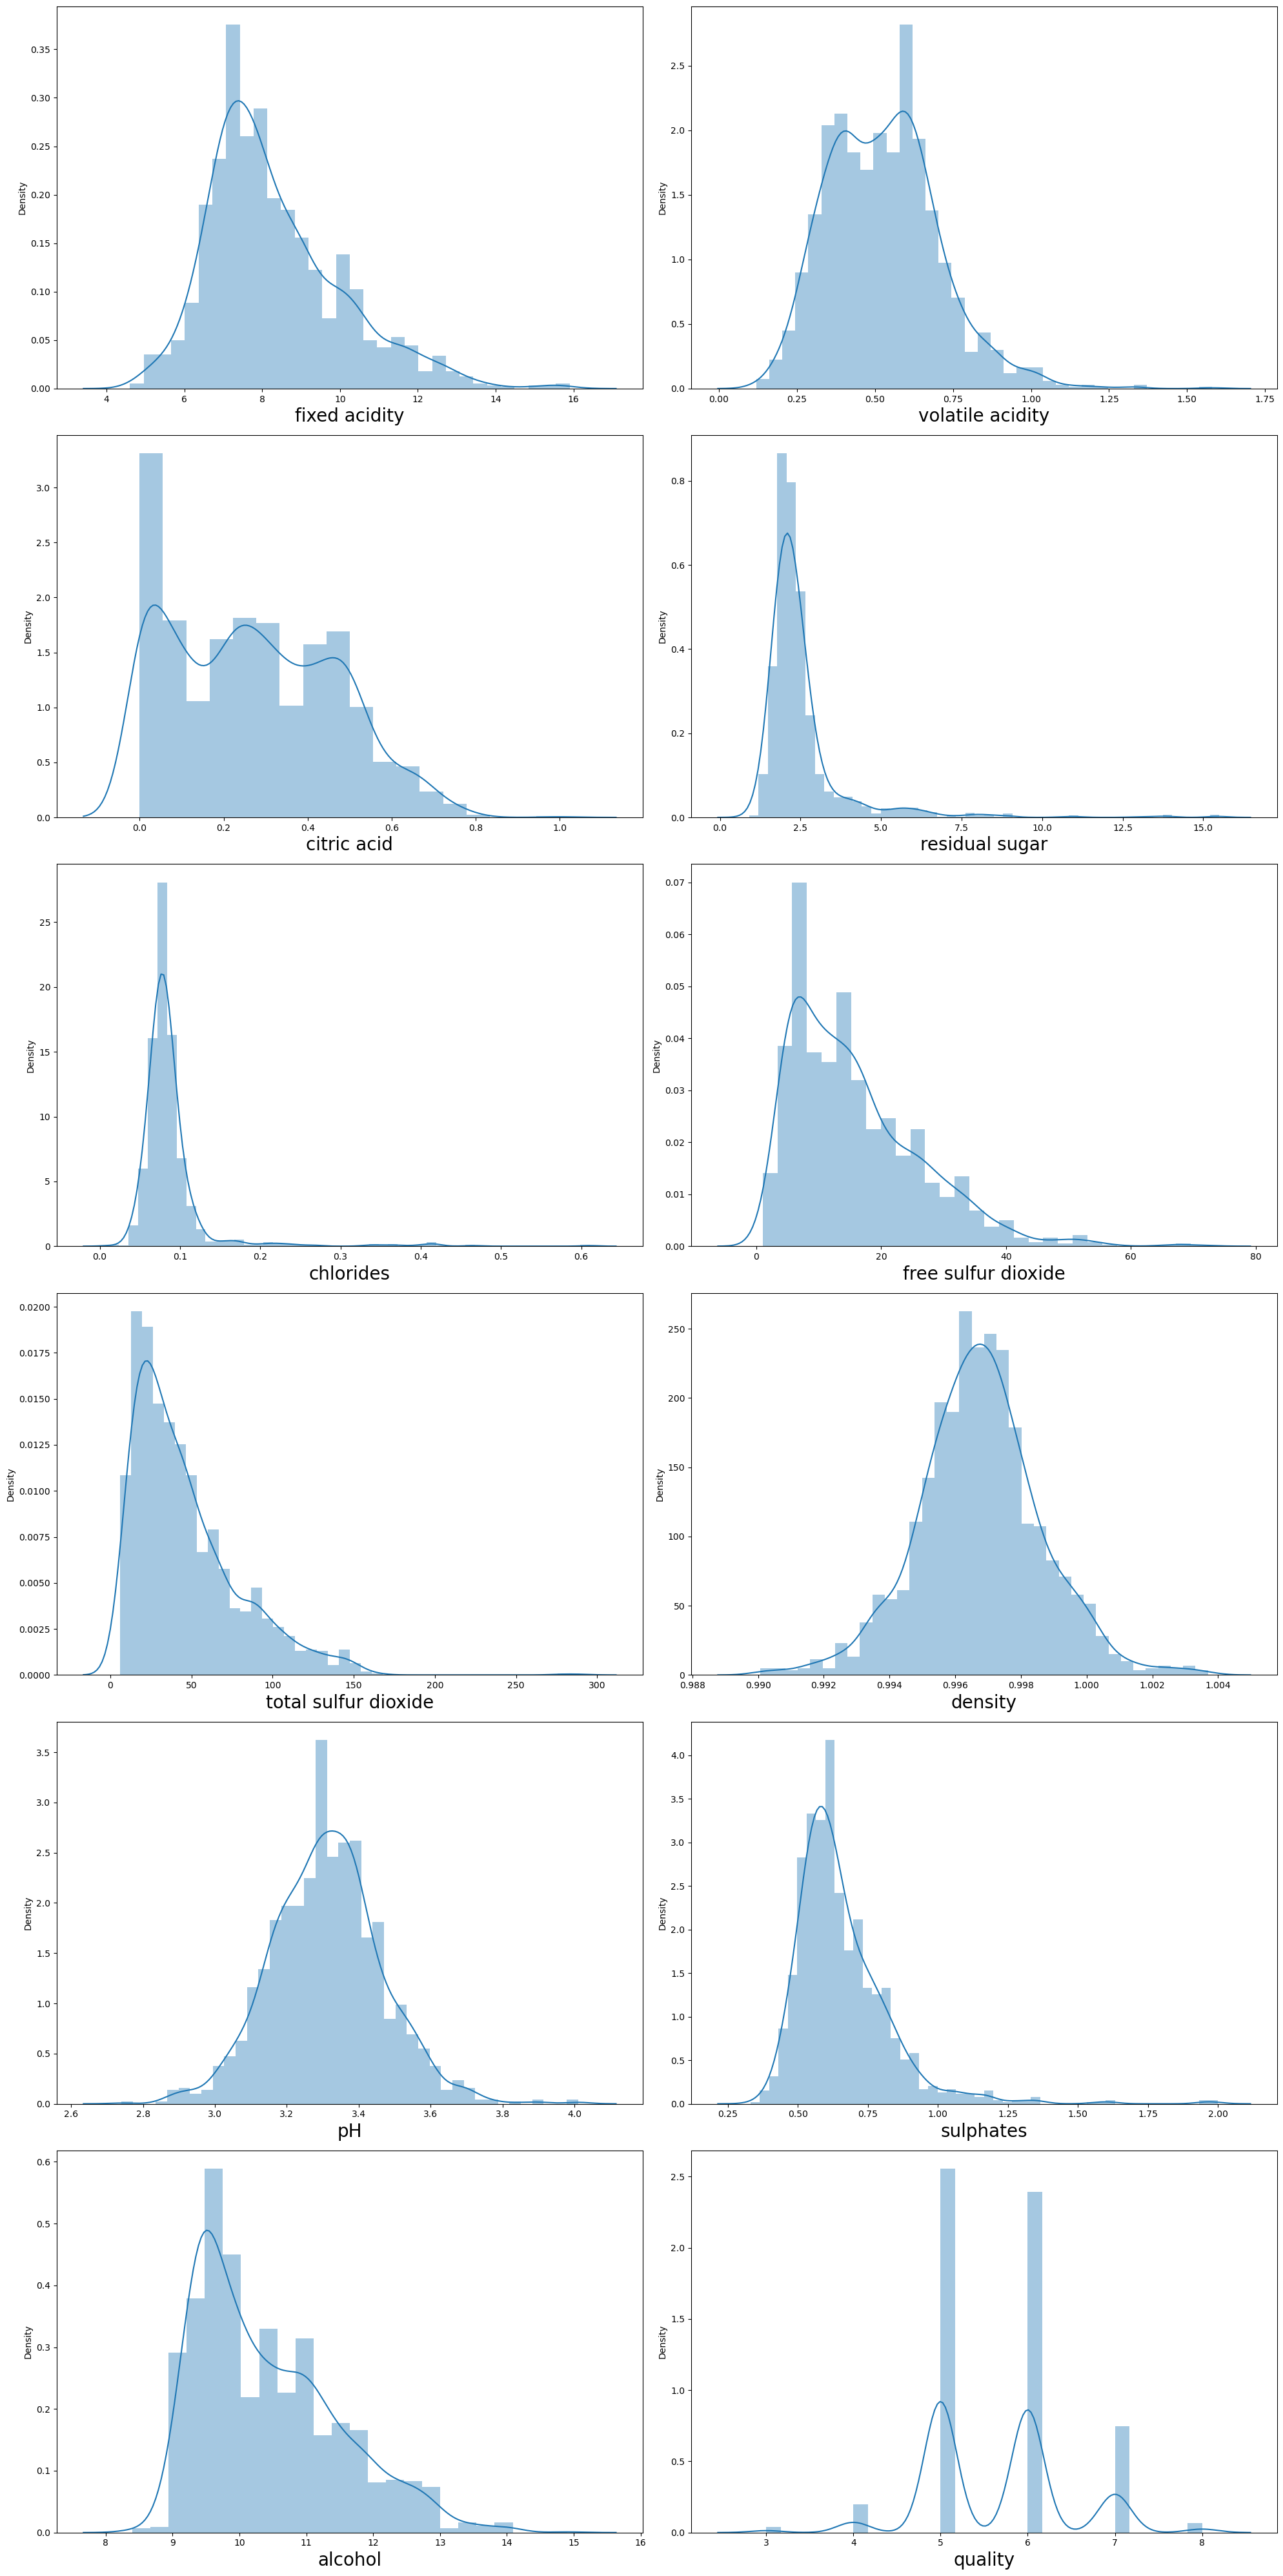

In [8]:
plt.figure(figsize=(20,40))
pn = 1
for column in data:
    
    sns.distplot(data[column],ax=plt.subplot(6,2,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()  

- From above graphs we can see that There is slight right skewness in residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates and alcohol
- Rest of the data seems normally distributed

We can observe that there are outliers in almost all columns which are needed to be Treated

#### Step 5: Bivariate analysis

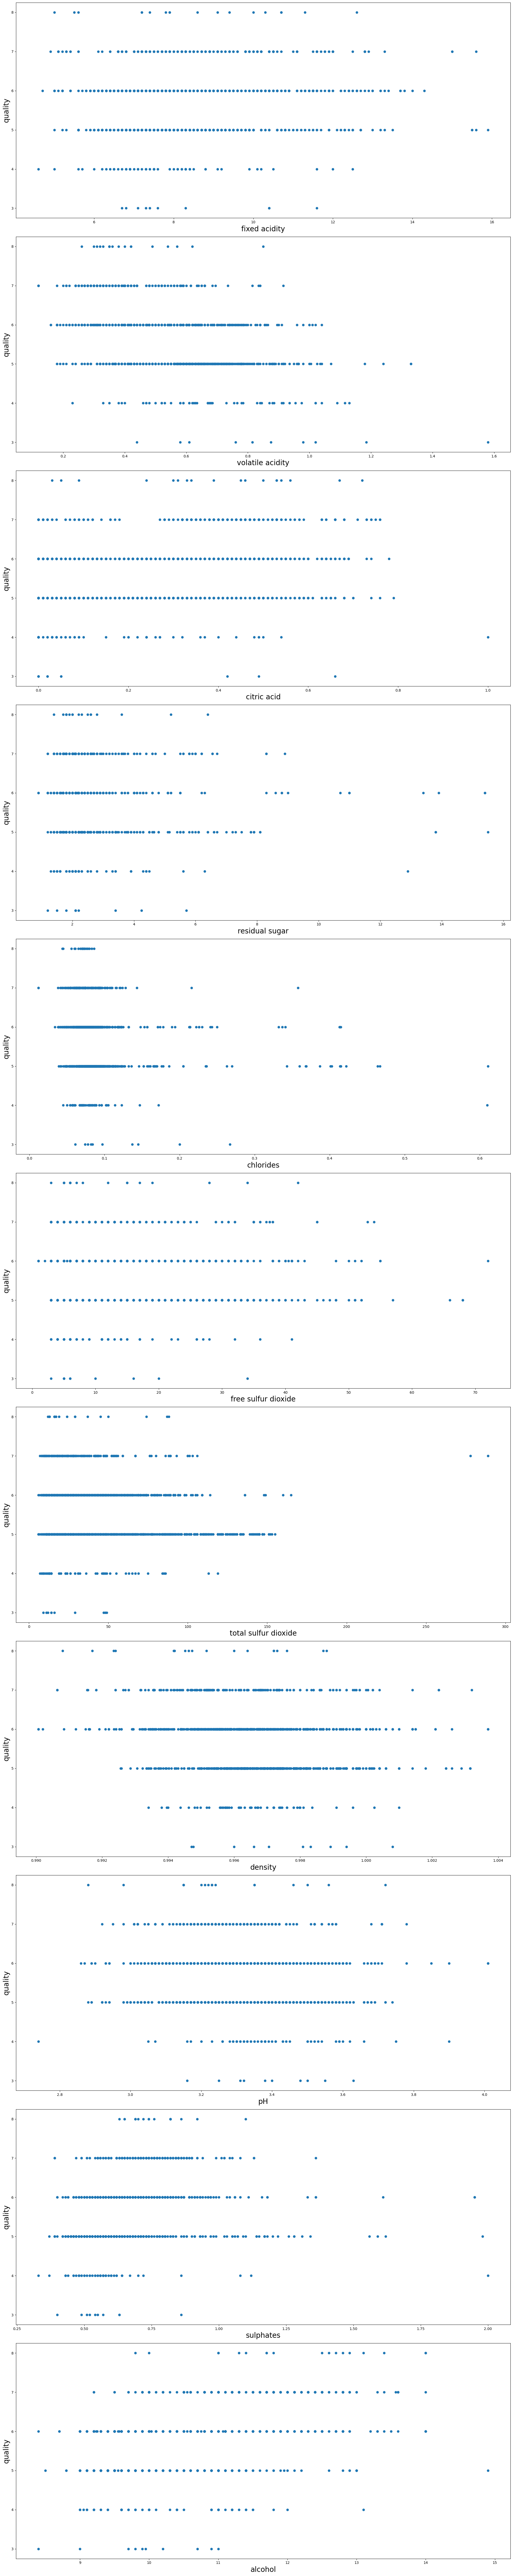

In [9]:
plt.figure(figsize=(20,100))
pn = 1
for column in data.drop(columns='quality'):
    ax=plt.subplot(11,1,pn)
    plt.scatter(data[column],data['quality'])
    plt.xlabel(column,fontsize = 20)
    plt.ylabel('quality',fontsize = 20)
    pn +=1
    
plt.tight_layout()  

From Above graphs we can observe that wine of quality 5 & 6 are having considerably more data points as compared to others

### Step 6 : multivariate corelation analysis

In [10]:
df_cor = data.corr().abs()
df_cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.124052
volatile acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.390558
citric acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.128907
free sulfur dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.050656
total sulfur dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.174919
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057731
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.251397


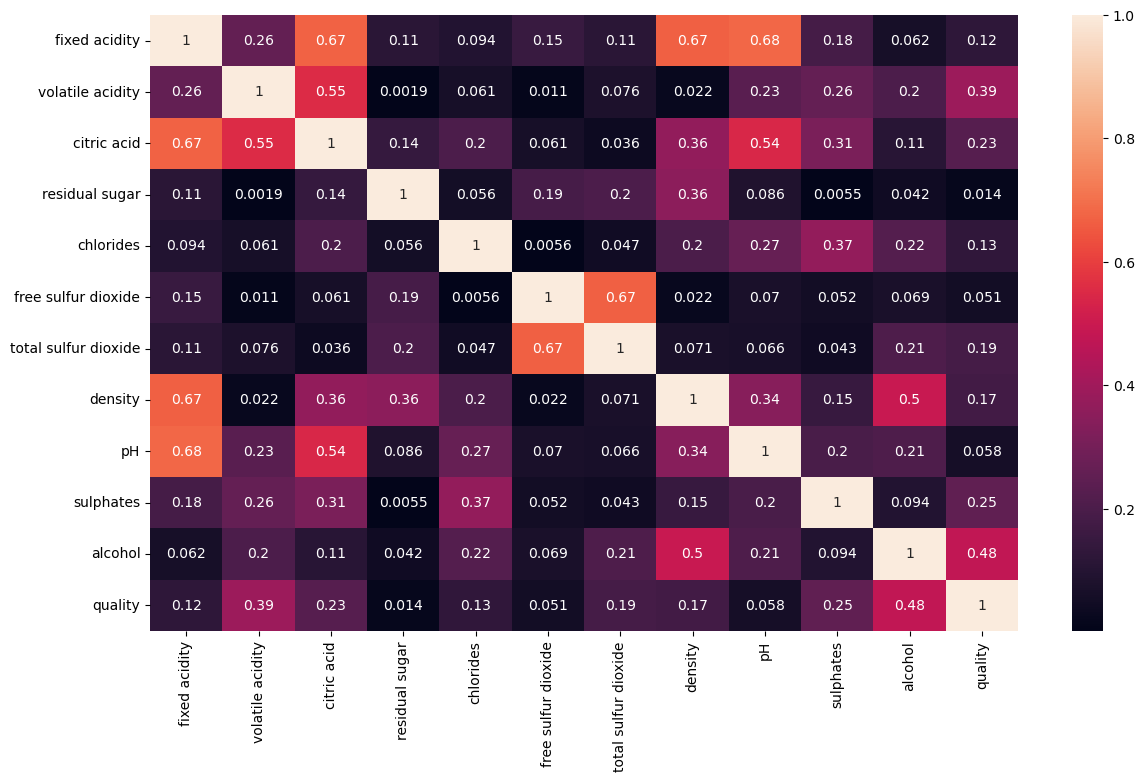

In [11]:
plt.figure(figsize=(14,8))
sns.heatmap(df_cor,annot=True,annot_kws={'size':10}) #annot display numbers(exp 0.26) in boxes and 10 is number font size
plt.show()

From above graph we can observe
- there in no multicolinearity
- even though there is very less colinearity between residual sugar and quality we cannot remove it since from somain knowledge we know that residual sugar is a important dertermination factor of wine

#### Step 7 : Outlier treatment

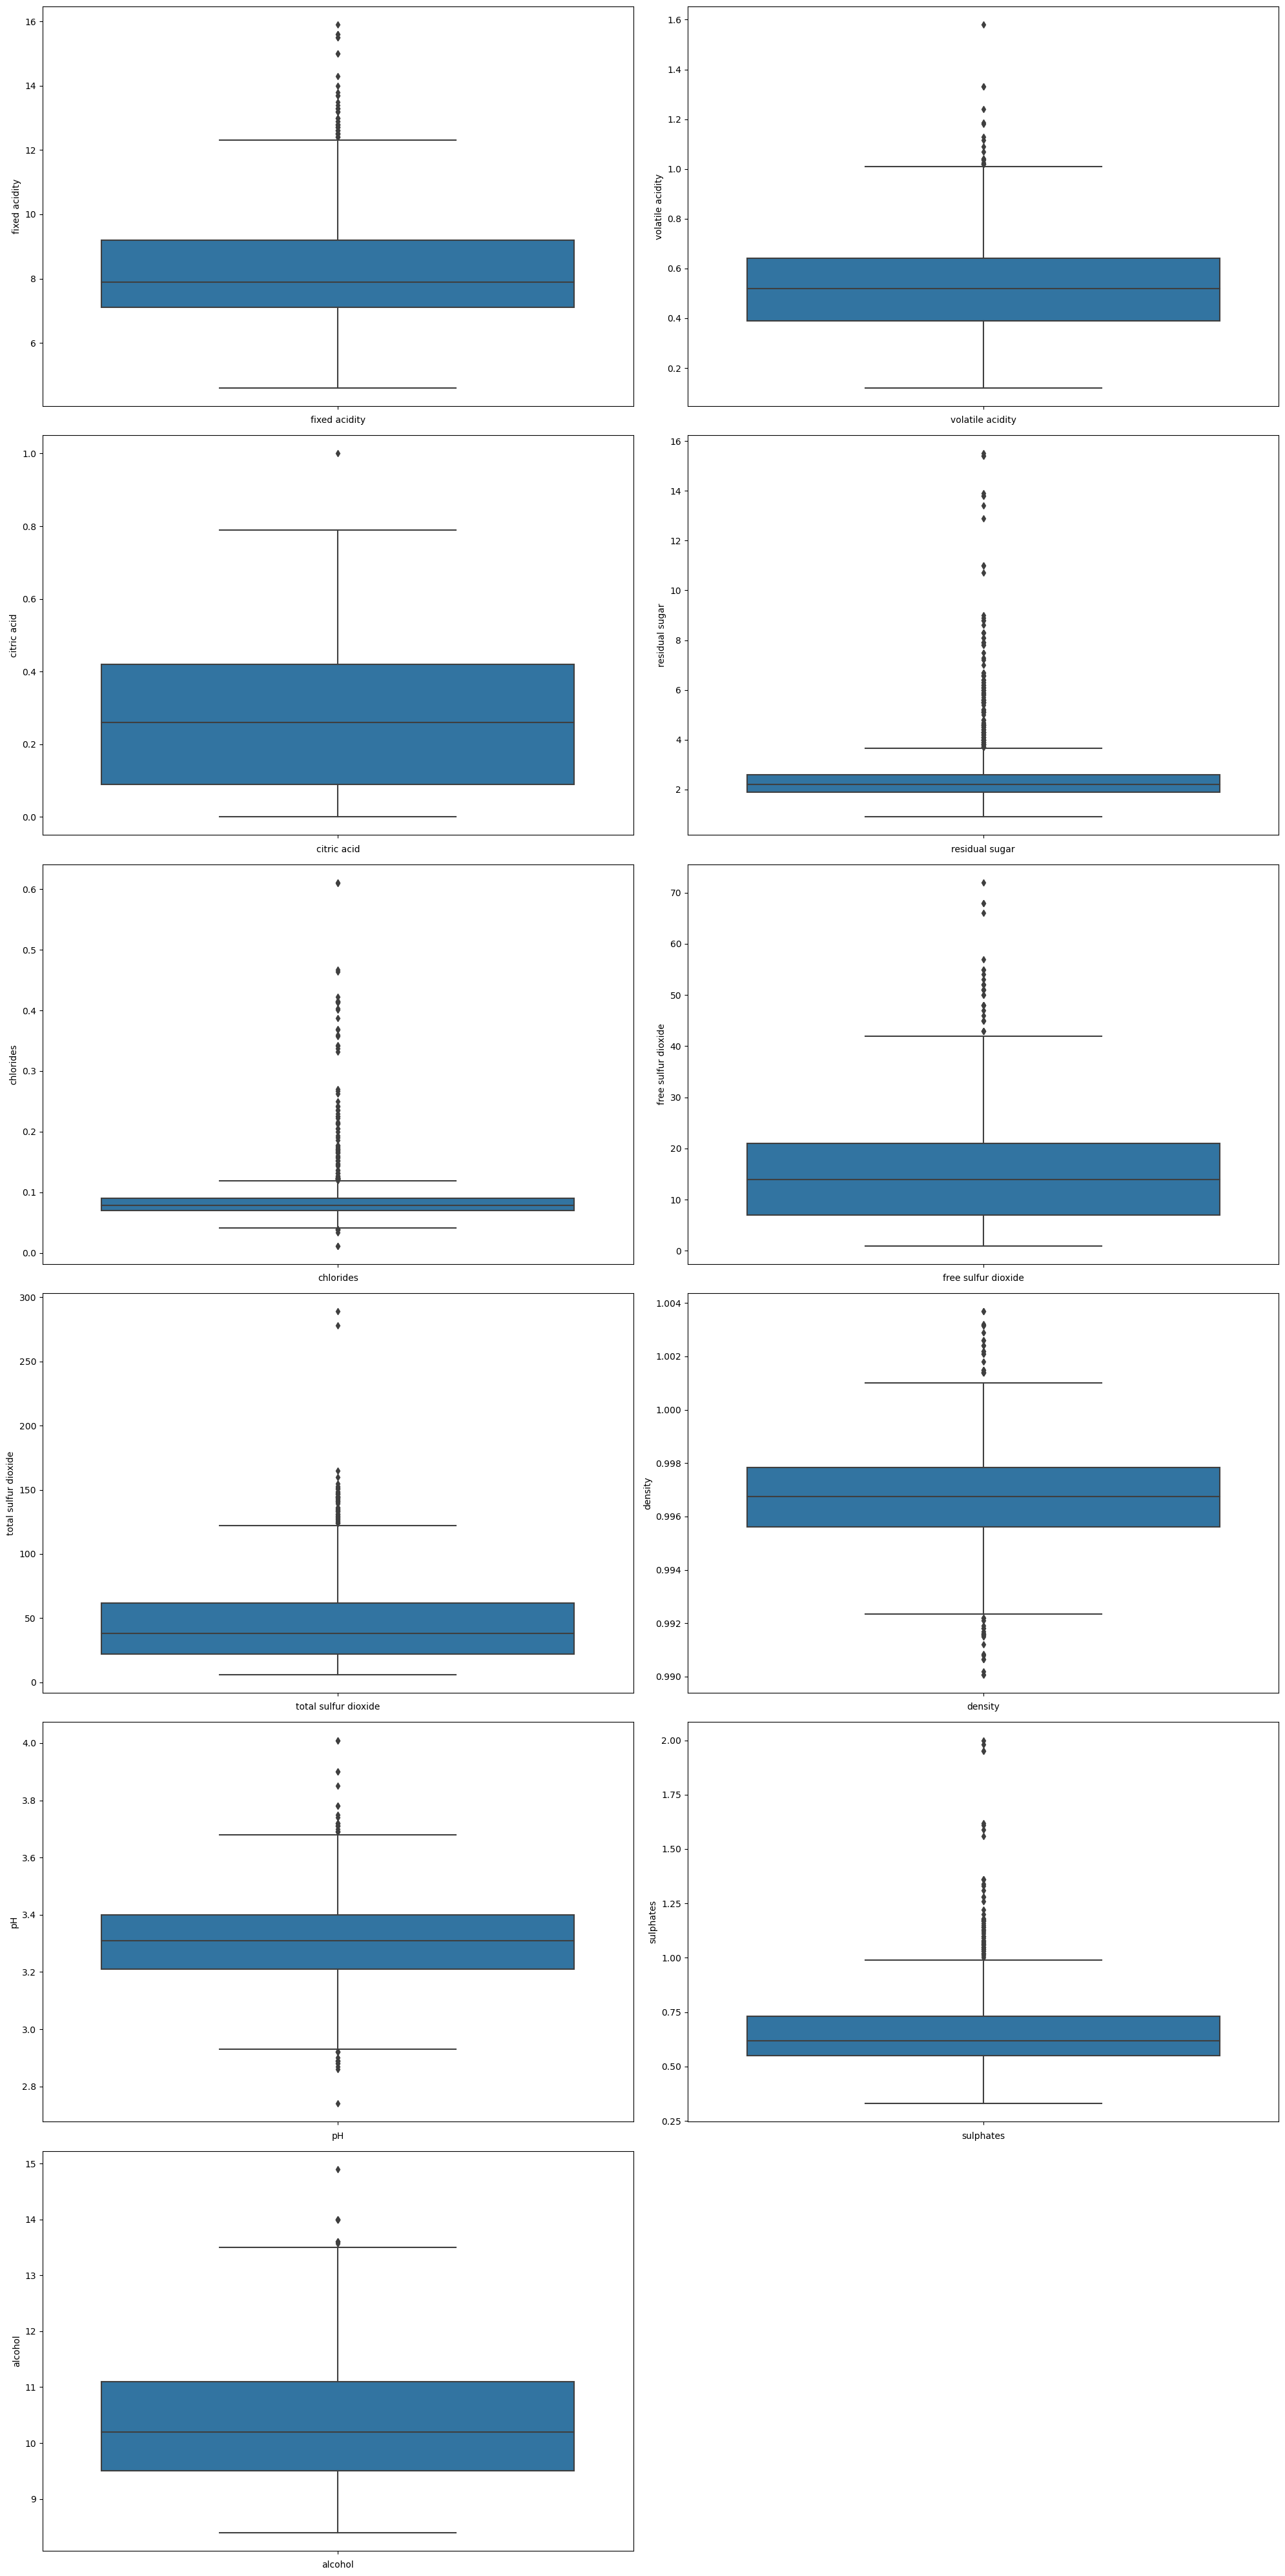

In [12]:
plt.figure(figsize=(20,40))
pn = 1
for column in data.drop(columns='quality'):
    
    sns.boxplot(y=data[column],ax=plt.subplot(6,2,pn))
    plt.xlabel(column)
    pn +=1
    
plt.tight_layout()  

In [13]:
# treating out liers using z score
from scipy.stats import zscore
z = np.abs(zscore(data.drop(columns='quality')))

In [14]:
z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [15]:
z[z>3].count()

fixed acidity           12
volatile acidity        10
citric acid              1
residual sugar          30
chlorides               31
free sulfur dioxide     22
total sulfur dioxide    15
density                 18
pH                       8
sulphates               27
alcohol                  8
dtype: int64

In [16]:
z.shape

(1599, 11)

In [17]:
x=data[z<3]
x=x.drop(columns='quality')
x['quality']=data['quality']
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
x.dropna(inplace = True)

In [19]:
x.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
x.shape

(1458, 12)

In [21]:
x.reset_index(drop=True,inplace=True)

In [22]:
y = x['quality']
x=x.drop(columns='quality')

In [23]:
print('Data Loss = ',np.round(((data.shape[0]-x.shape[0])/data.shape[0])*100,2),'%')

Data Loss =  8.82 %


since less than 10 % of data is lost we can continue

### Step 8 : Checking skewness

In [24]:
x.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

- there are 7 columns having skewness > 0.5 
- we need to remove skeweness using power transform

In [25]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
# box-cox since only positive skeweness

x = scaler.fit_transform(x)
x

array([[-0.46910218,  1.04577542, -1.52186998, ...,  1.35995444,
        -0.58823037, -1.11232895],
       [-0.17212704,  1.90240432, -1.52186998, ..., -0.81842137,
         0.45352708, -0.52685366],
       [-0.17212704,  1.34481498, -1.24278981, ..., -0.38286787,
         0.22198916, -0.52685366],
       ...,
       [-1.45195519, -0.00716591, -0.66389542, ...,  0.74543779,
         0.9322481 ,  0.7428399 ],
       [-1.88631136,  0.75846579, -0.72514559, ...,  1.76196223,
         0.66861292, -0.03320546],
       [-1.77310975, -1.3354534 ,  1.0702808 , ...,  0.53744195,
         0.30109116,  0.7428399 ]])

### Step 9 : setting arbitrary value to target

In [26]:
# setting 7 as arbitrary value
y1 = []
for i in range(len(y)):
    if y[i]<7:
        y1.append(0)
    else:
        y1.append(1)
        
y1=pd.Series(y1)
y1.value_counts()

0    1257
1     201
dtype: int64

### Step 10 : Train Test split

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
log_reg = LogisticRegression()

In [28]:
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [29]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,1) == round(test_acc*100,1):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
8,370.0,89.295517,89.315068
23,878.0,89.295517,89.315068
20,864.0,89.295517,89.315068
13,583.0,89.021043,89.041096
22,877.0,89.021043,89.041096
2,305.0,89.021043,89.041096
18,782.0,89.021043,89.041096
24,943.0,89.021043,89.041096
6,353.0,89.021043,89.041096
21,872.0,89.021043,89.041096


In [30]:
# Now splitting thee model at best random state i.e 370
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.25,random_state=370)

In [31]:
y_train.value_counts()

0    932
1    161
dtype: int64

### Step 11 : Resampling training data

In [32]:
# using smote
from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.75) # increasing data upto 75% 
x_train,y_train = ov_sm.fit_resample(x_train,y_train)
y_train.value_counts()

0    932
1    699
dtype: int64

### Step 12 : training the model

Logistic regression 

In [33]:
# Training
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_test_pred=lr.predict(x_test)
print (accuracy_score(y_test,lr_test_pred))

0.8


In [34]:
x2 = x
y2 = y1
ov_sm1 = SMOTE(sampling_strategy=0.80) # increasing data upto 80% 
x2,y2 = ov_sm.fit_resample(x2,y2)
y2.value_counts()

0    1257
1     942
dtype: int64

In [35]:
# Find best cv
from sklearn.model_selection import cross_val_score
lr_ac_score = accuracy_score(y_test,lr_test_pred)*100
for i in range(2,10):
    lr_cv_score=cross_val_score(lr,x2,y2,cv=i)
    lr_cv_score_mean = lr_cv_score.mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score_mean*100,'\nAccuracy score',lr_ac_score,end = '\n\n')
    


cv =  2 
Cross Validation score =  76.44110348250476 
Accuracy score 80.0


cv =  3 
Cross Validation score =  79.71805366075489 
Accuracy score 80.0


cv =  4 
Cross Validation score =  79.67229673787051 
Accuracy score 80.0


cv =  5 
Cross Validation score =  79.49037067715882 
Accuracy score 80.0


cv =  6 
Cross Validation score =  79.66577825424478 
Accuracy score 80.0


cv =  7 
Cross Validation score =  80.12363331744588 
Accuracy score 80.0


cv =  8 
Cross Validation score =  79.80773059057731 
Accuracy score 80.0


cv =  9 
Cross Validation score =  80.12434481989517 
Accuracy score 80.0



In [36]:
lr_s_cv_score=cross_val_score(lr,x2,y2,cv=9)
lr_s_cv_score_mean = lr_s_cv_score.mean()
print('\nCross Validation score = ',lr_s_cv_score_mean*100,'\nAccuracy score = ',lr_ac_score,'\nDifference = ',lr_ac_score-(lr_s_cv_score_mean*100))


Cross Validation score =  80.12434481989517 
Accuracy score =  80.0 
Difference =  -0.1243448198951711


Since only 1.1% difference we can say our model is not overfitted

##### Random  forest classifer

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_test_pred=rfc.predict(x_test)
rfc_ac_score = accuracy_score(y_test,rfc_test_pred)*100
print (rfc_ac_score)

90.13698630136986


In [38]:
# cross validation
rfc_s_cv_score=cross_val_score(rfc,x2,y2,cv=9)
rfc_s_cv_score_mean = rfc_s_cv_score.mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score,'\nDifference = ',(rfc_s_cv_score_mean*100)-rfc_ac_score)


Cross Validation score =  92.35976357756218 
Accuracy score =  90.13698630136986 
Difference =  2.2227772761923177


Since only 2.2% difference we can say our model is not overfitted

##### AdaBoostClassifier

In [39]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(x_train,y_train)
abc_test_pred=abc.predict(x_test)
abc_ac_score = accuracy_score(y_test,abc_test_pred)*100
print (abc_ac_score)

83.83561643835617


In [40]:
# cross validation
abc_s_cv_score=cross_val_score(abc,x2,y2,cv=9)
abc_s_cv_score_mean = abc_s_cv_score.mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score,'\nDifference = ',(abc_s_cv_score_mean*100)-abc_ac_score)


Cross Validation score =  82.81123378313073 
Accuracy score =  83.83561643835617 
Difference =  -1.0243826552254376


Since only 0.02% difference we can say our model is not overfitted

##### GradientBoostingClassifier

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_test_pred=gbc.predict(x_test)
gbc_ac_score = accuracy_score(y_test,gbc_test_pred)*100
print (gbc_ac_score)

88.4931506849315


In [42]:
# cross validation
gbc_s_cv_score=cross_val_score(gbc,x2,y2,cv=9)
gbc_s_cv_score_mean = gbc_s_cv_score.mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score,'\nDifference = ',(gbc_s_cv_score_mean*100)-gbc_ac_score)


Cross Validation score =  87.49507453254526 
Accuracy score =  88.4931506849315 
Difference =  -0.9980761523862469


Since only 1.1% difference we can say our model is not overfitted

##### XGBClassifier

In [43]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_test_pred=xgb.predict(x_test)
xgb_ac_score = accuracy_score(y_test,xgb_test_pred)*100
print (xgb_ac_score)


90.68493150684932


In [44]:
# cross validation
xgb_s_cv_score=cross_val_score(xgb,x2,y2,cv=9)
xgb_s_cv_score_mean = xgb_s_cv_score.mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score,'\nDifference = ',(xgb_s_cv_score_mean*100)-xgb_ac_score)


Cross Validation score =  91.31389167688933 
Accuracy score =  90.68493150684932 
Difference =  0.6289601700400027


Since less than 0.08% difference we can say our model is not overfitted

##### SVC

In [45]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_test_pred=svc.predict(x_test)
svc_ac_score = accuracy_score(y_test,svc_test_pred)*100
print (svc_ac_score)

85.47945205479452


In [46]:
# cross validation
svc_s_cv_score=cross_val_score(svc,x2,y2,cv=9)
svc_s_cv_score_mean = svc_s_cv_score.mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score,'\nDifference = ',(svc_s_cv_score_mean*100)-svc_ac_score)


Cross Validation score =  86.53860451284339 
Accuracy score =  85.47945205479452 
Difference =  1.059152458048871


Since less than 5% difference we can say our model is not overfitted

- from above models we can observe that xgboost is having highest accuracy and it is having  least difference therefore we choose xgboost classifier


### Hyperparameter Tuning

In [47]:
from sklearn.model_selection import GridSearchCV
grid_parm = {'max_depth':range(4,10),
             'learning_rate':np.arange(0.1,1),
             'n_estimators':[40,50,60,70,80,90,100,110],}

In [48]:
gcv = GridSearchCV(estimator=XGBClassifier(),param_grid=grid_parm,cv=9)
gcv.fit(x_train,y_train)
gcv.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 110}

In [49]:
final_model = XGBClassifier(learning_rate= 0.1,max_depth= 6,n_estimators= 110)
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

89.86301369863014


In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.96      0.92      0.94       325
           1       0.53      0.70      0.60        40

    accuracy                           0.90       365
   macro avg       0.74      0.81      0.77       365
weighted avg       0.91      0.90      0.90       365



#### roc curve

In [51]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [52]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.07692308 1.        ] 
tpr =  [0.  0.7 1. ] 
threshold =  [2 1 0]


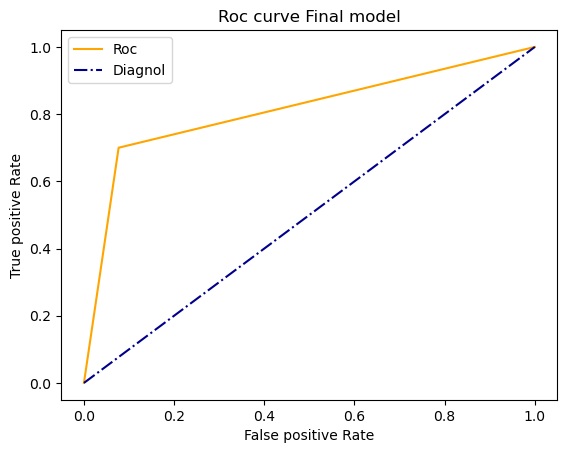

In [53]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

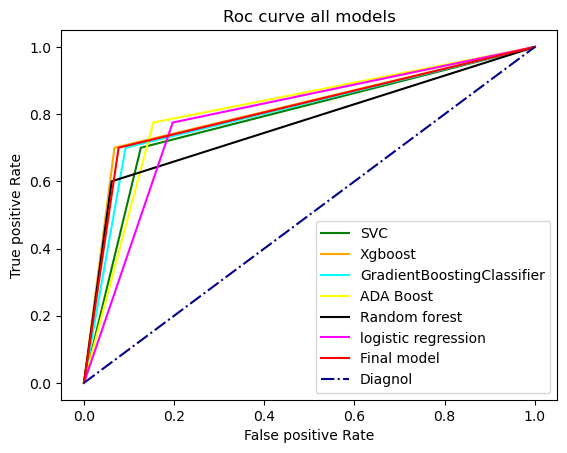

In [54]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc_test_pred)
fpr3,tpr3,threshold = roc_curve(y_test,xgb_test_pred)
fpr4,tpr4,threshold = roc_curve(y_test,gbc_test_pred)
fpr5,tpr5,threshold = roc_curve(y_test,abc_test_pred)
fpr6,tpr6,threshold = roc_curve(y_test,rfc_test_pred)
fpr7,tpr7,threshold = roc_curve(y_test,lr_test_pred)



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='magenta',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Feature Importance

In [55]:
best_features=final_model.feature_importances_

In [56]:
feature_importance_df = pd.DataFrame({'Feature': data.drop(columns='quality').columns, 'Importance': best_features})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

In [57]:
feature_importance_df

,Feature,Importance
10,alcohol,0.376282
9,sulphates,0.108464
6,total sulfur dioxide,0.070205
1,volatile acidity,0.069553
2,citric acid,0.067951
5,free sulfur dioxide,0.058694
8,pH,0.055712
0,fixed acidity,0.053571
3,residual sugar,0.052391
4,chlorides,0.044143


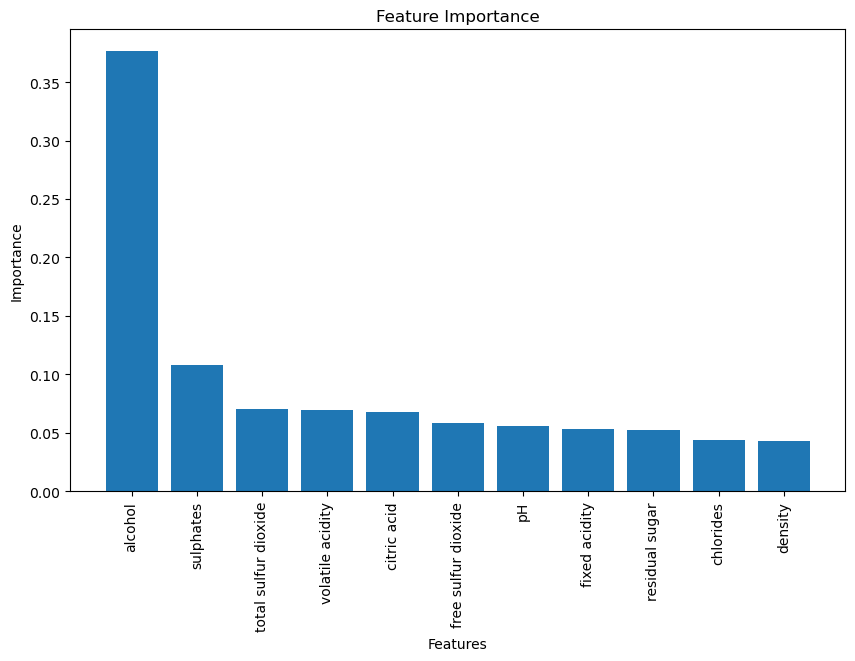

In [58]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

### Saving Model

In [59]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

## Conclusion 

##### 1. For this problem eventhough from roc curve graph we can see that our Final model(Red colored) has more area under the curve therefore it is the best  model

##### 2. From feature importance graph we can see that alcohol is the most imprtant physiochemical property that make a wine 'good', followed by  volatile acidity and sulphates